In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import os
#import folium

import warnings
warnings.filterwarnings("ignore")

In [2]:
DATA_DIR = '/Users/ommar/Desktop/berlin-airbnb-data'
#DATA_DIR = './Data'
#DATA_DIR = './Data'
FILE_NAME = 'reviews_summary.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
airbnb = pd.read_csv(data_path)
airbnb.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."


In [3]:
# drop unnecessary columns
airbnb.drop(['reviewer_id', 'reviewer_name', 'comments'], axis=1, inplace=True)

# rename id column and replace current value simply with 1 to later count the # of reviews per accommodation
airbnb.rename({'id':'review_count'}, axis=1, inplace=True)
airbnb.review_count = 1

# checking size and duplicates
print("The first dataset has {} rows and {} columns.".format(*airbnb.shape))
print("It contains {} duplicates.".format(airbnb.duplicated().sum()))

airbnb.head()

The first dataset has 401963 rows and 3 columns.
It contains 1242 duplicates.


,listing_id,review_count,date
0,2015,1,2016-04-11
1,2015,1,2016-04-15
2,2015,1,2016-04-26
3,2015,1,2016-05-10
4,2015,1,2016-05-14


In [4]:
# cast date-column from current object datatype to datetime datatype
airbnb.date = pd.to_datetime(airbnb.date, format="%Y-%m-%d")

In [5]:
count_2017_18 = airbnb[airbnb["date"].isin(pd.date_range('2017-11-01', '2018-10-31'))]
print("The dataset 2017/2018 has {} reviews and {} columns.".format(*count_2017_18.shape))

The dataset 2017/2018 has 165873 reviews and 3 columns.


In [6]:
# set the date as index and sort by index
count_2017_18 = count_2017_18.set_index('date').sort_index()

In [7]:
# group by month and listing_id, i.e. specific apartment 
# agg argument: #work on this col:  {#name the new col : #perform count operation}                        
count_2017_18_monthly = count_2017_18.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count']\
                                         .agg({'review_count':{'reviews_per_month':'count'}})\
                                         .reset_index()

In [8]:
# initial check
count_2017_18_monthly.head()

,date,listing_id,review_count
,,,reviews_per_month
0,2017-11-30,3309,1
1,2017-11-30,7071,2
2,2017-11-30,17409,3
3,2017-11-30,17904,3
4,2017-11-30,22415,2


In [9]:
# to flatten the multi-index, we a) reset the index in the groupby statement above ...
# ... and b) now define column names
count_2017_18_monthly.columns = ['date', 'listing_id', 'reviews_per_month']

# set date as index again
count_2017_18_monthly.set_index('date', inplace=True)

# check again
count_2017_18_monthly.head()

,listing_id,reviews_per_month
date,,
2017-11-30,3309,1
2017-11-30,7071,2
2017-11-30,17409,3
2017-11-30,17904,3
2017-11-30,22415,2


In [10]:
# get rid of date index
count_2017_18_monthly = count_2017_18_monthly.reset_index()

# group by listing_id and count reviews, turn it into a dataframe without groupby index
count_2017_18_monthly = pd.DataFrame(count_2017_18_monthly.groupby('listing_id')['reviews_per_month'].mean()\
                                                          .reset_index())

count_2017_18_monthly.head()

,listing_id,reviews_per_month
0,2015,2.888889
1,2695,2.000000
2,3309,1.000000
3,7071,3.454545
4,9991,1.000000


In [11]:
FILE_NAME = 'listings_summary.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
airbnb2 = pd.read_csv(data_path)
airbnb2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


In [12]:
# merge full 2017/2018 dataframe + add specific columns from df_2
airbnb2 = pd.merge(count_2017_18_monthly, airbnb2[['id', 'price', 'cleaning_fee', 'security_deposit', 'neighbourhood_group_cleansed', 
                          'latitude', 'longitude', 'property_type', 'accommodates', 
                          'bathrooms', 'bedrooms', 'host_is_superhost', 'instant_bookable', 'review_scores_value', 'amenities',
                                                  'bed_type', 'review_scores_rating', 
                                                   'review_scores_accuracy', 'review_scores_cleanliness', 
                                                   'review_scores_checkin', 'review_scores_communication',
                                                   'review_scores_location']], 
              left_on='listing_id', right_on='id')

# drop 'id' from right dataframe as it's the same as 'listing_id' on the left dataframe
airbnb2.drop(['id'], axis=1, inplace=True)

# shorten the name of one column
airbnb2.rename({'neighbourhood_group_cleansed':'neighbourhood'}, axis=1, inplace=True)

# check the dataframe
print("The dataset has {} rows and {} columns - after combining it.".format(*airbnb2.shape))
print("It contains {} duplicates.".format(airbnb.duplicated().sum()))
airbnb2.head()

The dataset has 13609 rows and 23 columns - after combining it.
It contains 1242 duplicates.


,listing_id,reviews_per_month,price,cleaning_fee,security_deposit,neighbourhood,latitude,longitude,property_type,accommodates,...,instant_bookable,review_scores_value,amenities,bed_type,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
0,2015,2.888889,$60.00,$30.00,$200.00,Mitte,52.534537,13.402557,Guesthouse,3,...,f,9.0,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",Real Bed,93.0,10.0,9.0,10.0,10.0,10.0
1,2695,2.000000,$17.00,$0.00,$0.00,Pankow,52.548513,13.404553,Apartment,2,...,f,10.0,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",Real Bed,100.0,10.0,10.0,10.0,10.0,10.0
2,3309,1.000000,$26.00,$30.00,$250.00,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,2,...,f,9.0,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",Pull-out Sofa,88.0,9.0,9.0,9.0,10.0,9.0
3,7071,3.454545,$42.00,$0.00,$0.00,Pankow,52.543157,13.415091,Apartment,2,...,f,9.0,"{Wifi,Heating,""Family/kid friendly"",Essentials...",Real Bed,96.0,10.0,10.0,10.0,10.0,10.0
4,9991,1.000000,$180.00,$80.00,$400.00,Pankow,52.533031,13.416047,Apartment,7,...,f,10.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",Real Bed,100.0,10.0,10.0,10.0,10.0,10.0


In [13]:
from geopy.distance import great_circle

In [14]:
#Use these or neighbourhood groups, try seeing the correlation with price of both.
def distance_to_mid(lat, lon):
    berlin_centre = (52.516667, 13.383333)
    accommodation = (lat, lon)
    return great_circle(berlin_centre, accommodation).km

def distance_to_hbf(lat, lon):
    berlin_centre = (52.52493, 13.369181)
    accommodation = (lat, lon)
    return great_circle(berlin_centre, accommodation).km

def distance_to_txl(lat, lon):
    berlin_centre = (52.559722, 13.287778)
    accommodation = (lat, lon)
    return great_circle(berlin_centre, accommodation).km

def distance_to_museum(lat, lon):
    berlin_centre = (52.521389, 13.395556)
    accommodation = (lat, lon)
    return great_circle(berlin_centre, accommodation).km

def distance_to_reichstag(lat, lon):
    berlin_centre = (52.5186, 13.3763)
    accommodation = (lat, lon)
    return great_circle(berlin_centre, accommodation).km

def distance_to_brandenburg(lat, lon):
    berlin_centre = (52.516272, 13.377722)
    accommodation = (lat, lon)
    return great_circle(berlin_centre, accommodation).km

In [15]:
airbnb2['distance_mid'] = airbnb2.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)

In [16]:
airbnb2['distance_hbf'] = airbnb2.apply(lambda x: distance_to_hbf(x.latitude, x.longitude), axis=1)

In [17]:
airbnb2['distance_txl'] = airbnb2.apply(lambda x: distance_to_txl(x.latitude, x.longitude), axis=1)

In [18]:
airbnb2['distance_museum'] = airbnb2.apply(lambda x: distance_to_museum(x.latitude, x.longitude), axis=1)

In [19]:
airbnb2['distance_reichstag'] = airbnb2.apply(lambda x: distance_to_reichstag(x.latitude, x.longitude), axis=1)

In [20]:
airbnb2['distance_brandenburg'] = airbnb2.apply(lambda x: distance_to_brandenburg(x.latitude, x.longitude), axis=1)

In [21]:
from collections import Counter

In [22]:
results = Counter()
airbnb2['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

results.most_common(30)

[('Wifi', 13171),
 ('Essentials', 13023),
 ('Heating', 12975),
 ('Kitchen', 12811),
 ('Washer', 11015),
 ('Hair dryer', 10492),
 ('Laptop friendly workspace', 9811),
 ('Hangers', 9782),
 ('Hot water', 8395),
 ('Iron', 7892),
 ('Shampoo', 7445),
 ('TV', 6448),
 ('Host greets you', 5830),
 ('Family/kid friendly', 5071),
 ('Free street parking', 4685),
 ('Smoke detector', 4600),
 ('Refrigerator', 4540),
 ('Dishes and silverware', 4437),
 ('Bed linens', 4235),
 ('Cooking basics', 4213),
 ('Stove', 4187),
 ('Internet', 3926),
 ('Lock on bedroom door', 3882),
 ('Oven', 3723),
 ('Coffee maker', 3204),
 ('Buzzer/wireless intercom', 3080),
 ('Elevator', 3007),
 ('First aid kit', 2808),
 ('Dishwasher', 2750),
 ('Long term stays allowed', 2680)]

In [23]:
sub_amenities = pd.DataFrame(results.most_common(60), columns=['amenity', 'count'])

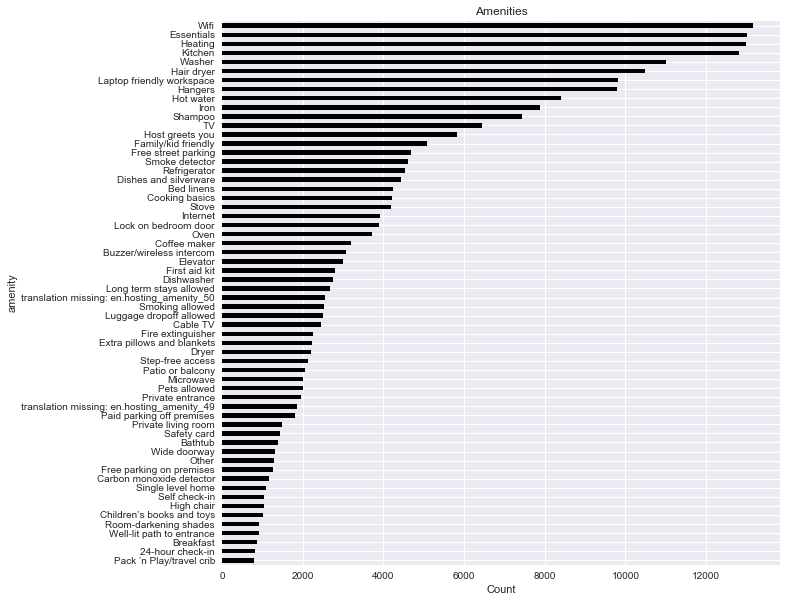

In [24]:
sub_amenities.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,10), legend=False, color='black',
                                                      title='Amenities')
plt.xlabel('Count');

In [25]:
airbnb2['Host_greets_you'] = airbnb2['amenities'].str.contains('Host greets you')
airbnb2['Stove'] = airbnb2['amenities'].str.contains('Stove')
airbnb2['Refrigerator'] = airbnb2['amenities'].str.contains('Refrigerator')
airbnb2['Cooking_basics'] = airbnb2['amenities'].str.contains('Cooking basics')
airbnb2['Long_term_stays_allowed'] = airbnb2['amenities'].str.contains('Long term stays allowed')
airbnb2['Smoking_allowed'] = airbnb2['amenities'].str.contains('Smoking allowed')
airbnb2['Pets_allowed'] = airbnb2['amenities'].str.contains('Pets allowed')
airbnb2['Patio_Balcony'] = airbnb2['amenities'].str.contains('Patio or balcony')
airbnb2['Breakfast'] = airbnb2['amenities'].str.contains('Breakfast')

In [26]:
airbnb2.drop(['amenities'], axis=1, inplace=True)

In [27]:
#one-hot encoding binary variables
#Key: 1 = True; 0 = False

one_hot_list = ['Host_greets_you', 'Cooking_basics', 'Stove', 'Refrigerator', 'Cooking_basics', 'Long_term_stays_allowed', 'Smoking_allowed', 'Pets_allowed', 'Patio_Balcony', 'Breakfast']
one_hot_col = list(airbnb2[one_hot_list])

airbnb2 = pd.concat([airbnb2, pd.get_dummies(airbnb2.Host_greets_you, prefix='Host_greets_you', drop_first=True)], axis=1)
airbnb2.rename(columns={'Host_greets_you_True': 'Host_greets_you_code'}, inplace='True')

airbnb2 = pd.concat([airbnb2, pd.get_dummies(airbnb2.Stove, prefix='Stove', drop_first=True)], axis=1)
airbnb2.rename(columns={'Stove_True': 'Stove_code'}, inplace='True')

airbnb2 = pd.concat([airbnb2, pd.get_dummies(airbnb2.Refrigerator, prefix='Refrigerator', drop_first=True)], axis=1)
airbnb2.rename(columns={'Refrigerator_True': 'Refrigerator_code'}, inplace='True')

airbnb2 = pd.concat([airbnb2, pd.get_dummies(airbnb2.Refrigerator, prefix='Refrigerator', drop_first=True)], axis=1)
airbnb2.rename(columns={'Refrigerator_True': 'Refrigerator_code'}, inplace='True')

airbnb2 = pd.concat([airbnb2, pd.get_dummies(airbnb2.Cooking_basics, prefix='Cooking_basics', drop_first=True)], axis=1)
airbnb2.rename(columns={'Cooking_basics_True': 'Cooking_basics_code'}, inplace='True')

airbnb2 = pd.concat([airbnb2, pd.get_dummies(airbnb2.Long_term_stays_allowed, prefix='Long_term_stays_allowed', drop_first=True)], axis=1)
airbnb2.rename(columns={'Long_term_stays_allowed_True': 'Long_term_stays_allowed_code'}, inplace='True')

airbnb2 = pd.concat([airbnb2, pd.get_dummies(airbnb2.Smoking_allowed, prefix='Smoking_allowed', drop_first=True)], axis=1)
airbnb2.rename(columns={'Smoking_allowed_True': 'Smoking_allowed_code'}, inplace='True')

airbnb2 = pd.concat([airbnb2, pd.get_dummies(airbnb2.Pets_allowed, prefix='Pets_allowed', drop_first=True)], axis=1)
airbnb2.rename(columns={'Pets_allowed_True': 'Pets_allowed_code'}, inplace='True')

airbnb2 = pd.concat([airbnb2, pd.get_dummies(airbnb2.Patio_Balcony, prefix='Patio_Balcony', drop_first=True)], axis=1)
airbnb2.rename(columns={'Patio_Balcony_True': 'Patio_Balcony_code'}, inplace='True')

airbnb2 = pd.concat([airbnb2, pd.get_dummies(airbnb2.Breakfast, prefix='Breakfast', drop_first=True)], axis=1)
airbnb2.rename(columns={'Breakfast_True': 'Breakfast_code'}, inplace='True')


airbnb2 = airbnb2.drop(one_hot_col, axis=1) #drops original binary T/F variables

airbnb2 = airbnb2.loc[:, ~airbnb2.columns.duplicated()] #prevents needless concats
airbnb2

,listing_id,reviews_per_month,price,cleaning_fee,security_deposit,neighbourhood,latitude,longitude,property_type,accommodates,...,distance_brandenburg,Host_greets_you_code,Stove_code,Refrigerator_code,Cooking_basics_code,Long_term_stays_allowed_code,Smoking_allowed_code,Pets_allowed_code,Patio_Balcony_code,Breakfast_code
0,2015,2.888889,$60.00,$30.00,$200.00,Mitte,52.534537,13.402557,Guesthouse,3,...,2.635882,0,1,1,1,1,0,0,0,0
1,2695,2.000000,$17.00,$0.00,$0.00,Pankow,52.548513,13.404553,Apartment,2,...,4.018223,0,0,0,0,0,0,0,0,0
2,3309,1.000000,$26.00,$30.00,$250.00,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,2,...,2.740901,1,0,0,0,1,0,1,0,0
3,7071,3.454545,$42.00,$0.00,$0.00,Pankow,52.543157,13.415091,Apartment,2,...,3.914997,0,0,0,0,0,0,0,0,0
4,9991,1.000000,$180.00,$80.00,$400.00,Pankow,52.533031,13.416047,Apartment,7,...,3.192996,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13604,29583461,1.000000,$22.00,NaN,NaN,Tempelhof - Schöneberg,52.463240,13.419392,Apartment,1,...,6.537102,0,0,0,0,0,0,1,0,1
13605,29625891,1.000000,$40.00,NaN,NaN,Pankow,52.547942,13.425948,Apartment,2,...,4.800230,0,0,0,0,0,0,0,0,0
13606,29628409,1.000000,$35.00,$0.00,NaN,Mitte,52.510429,13.397700,Bed and breakfast,2,...,1.499959,0,0,0,0,0,1,0,0,0
13607,29640657,1.000000,$27.00,$15.00,$0.00,Lichtenberg,52.548314,13.501537,Apartment,4,...,9.101450,0,1,1,1,0,0,0,1,0


In [28]:
airbnb2['property_type_code'] = airbnb2['property_type'].astype('category').cat.codes
    #Key: 0 = House;1 = Apartment; 2 = Loft;3 = Guesthouse;4 = Condomonium;
airbnb2['property_type_code'].replace([18,20,15,12,1],['0','2','3','4', '1'],inplace=True)

airbnb2['neighbourhood_code'] = airbnb2['neighbourhood'].astype('category').cat.codes
    #Key: 4=Mitte; Pankow=6; Tempelhof - Schöneberg=10; Friedrichshain-Kreuzberg=1; Treptow - Köpenick=11;
    #    Neukölln=5; Charlottenburg-Wilm.=0; Reinickendorf=7, Lichtenberg=2; Steglitz - Zehlendorf=9;
    #    Marzahn - Hellersdorf=3; Spandau=8
    
airbnb2['bed_type_code'] = airbnb2['bed_type'].astype('category').cat.codes
    #Key: Real bed=4; Pull-out=3; Futon=2; Couch=1; Airbed=0
airbnb2.bed_type.unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Couch', 'Airbed'],
      dtype=object)

In [29]:
airbnb2 = pd.concat([airbnb2, pd.get_dummies(airbnb2.instant_bookable, prefix='instant_bookable', drop_first=True)], axis=1)
airbnb2.rename(columns={'instant_bookable_True': 'nstant_bookable_code'}, inplace='True')
airbnb2

,listing_id,reviews_per_month,price,cleaning_fee,security_deposit,neighbourhood,latitude,longitude,property_type,accommodates,...,Cooking_basics_code,Long_term_stays_allowed_code,Smoking_allowed_code,Pets_allowed_code,Patio_Balcony_code,Breakfast_code,property_type_code,neighbourhood_code,bed_type_code,instant_bookable_t
0,2015,2.888889,$60.00,$30.00,$200.00,Mitte,52.534537,13.402557,Guesthouse,3,...,1,1,0,0,0,0,16,4,4,0
1,2695,2.000000,$17.00,$0.00,$0.00,Pankow,52.548513,13.404553,Apartment,2,...,0,0,0,0,0,0,1,6,4,0
2,3309,1.000000,$26.00,$30.00,$250.00,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,2,...,0,1,0,1,0,0,1,10,3,0
3,7071,3.454545,$42.00,$0.00,$0.00,Pankow,52.543157,13.415091,Apartment,2,...,0,0,0,0,0,0,1,6,4,0
4,9991,1.000000,$180.00,$80.00,$400.00,Pankow,52.533031,13.416047,Apartment,7,...,1,0,0,0,0,0,1,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13604,29583461,1.000000,$22.00,NaN,NaN,Tempelhof - Schöneberg,52.463240,13.419392,Apartment,1,...,0,0,0,1,0,1,1,10,4,1
13605,29625891,1.000000,$40.00,NaN,NaN,Pankow,52.547942,13.425948,Apartment,2,...,0,0,0,0,0,0,1,6,4,1
13606,29628409,1.000000,$35.00,$0.00,NaN,Mitte,52.510429,13.397700,Bed and breakfast,2,...,0,0,1,0,0,0,3,4,4,1
13607,29640657,1.000000,$27.00,$15.00,$0.00,Lichtenberg,52.548314,13.501537,Apartment,4,...,1,0,0,0,1,0,1,2,4,1


In [30]:
airbnb2 = pd.concat([airbnb2, pd.get_dummies(airbnb2.host_is_superhost, prefix='host_is_superhost', drop_first=True)], axis=1)
airbnb2.rename(columns={'superhost_True': 'superhost_code'}, inplace='True')
airbnb2

,listing_id,reviews_per_month,price,cleaning_fee,security_deposit,neighbourhood,latitude,longitude,property_type,accommodates,...,Long_term_stays_allowed_code,Smoking_allowed_code,Pets_allowed_code,Patio_Balcony_code,Breakfast_code,property_type_code,neighbourhood_code,bed_type_code,instant_bookable_t,host_is_superhost_t
0,2015,2.888889,$60.00,$30.00,$200.00,Mitte,52.534537,13.402557,Guesthouse,3,...,1,0,0,0,0,16,4,4,0,1
1,2695,2.000000,$17.00,$0.00,$0.00,Pankow,52.548513,13.404553,Apartment,2,...,0,0,0,0,0,1,6,4,0,0
2,3309,1.000000,$26.00,$30.00,$250.00,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,2,...,1,0,1,0,0,1,10,3,0,0
3,7071,3.454545,$42.00,$0.00,$0.00,Pankow,52.543157,13.415091,Apartment,2,...,0,0,0,0,0,1,6,4,0,1
4,9991,1.000000,$180.00,$80.00,$400.00,Pankow,52.533031,13.416047,Apartment,7,...,0,0,0,0,0,1,6,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13604,29583461,1.000000,$22.00,NaN,NaN,Tempelhof - Schöneberg,52.463240,13.419392,Apartment,1,...,0,0,1,0,1,1,10,4,1,0
13605,29625891,1.000000,$40.00,NaN,NaN,Pankow,52.547942,13.425948,Apartment,2,...,0,0,0,0,0,1,6,4,1,0
13606,29628409,1.000000,$35.00,$0.00,NaN,Mitte,52.510429,13.397700,Bed and breakfast,2,...,0,1,0,0,0,3,4,4,1,0
13607,29640657,1.000000,$27.00,$15.00,$0.00,Lichtenberg,52.548314,13.501537,Apartment,4,...,0,0,0,1,0,1,2,4,1,0


In [31]:
airbnb2.corr()

,listing_id,reviews_per_month,latitude,longitude,accommodates,bathrooms,bedrooms,review_scores_value,review_scores_rating,review_scores_accuracy,...,Cooking_basics_code,Long_term_stays_allowed_code,Smoking_allowed_code,Pets_allowed_code,Patio_Balcony_code,Breakfast_code,neighbourhood_code,bed_type_code,instant_bookable_t,host_is_superhost_t
listing_id,1.000000,0.053337,-0.004722,0.007482,-0.087476,-0.013186,-0.101675,0.038676,0.045080,-0.003417,...,-0.038049,-0.115249,0.062667,0.021536,-0.018742,0.101635,-0.003973,0.135290,0.156106,-0.112612
reviews_per_month,0.053337,1.000000,0.038418,-0.034951,0.074038,-0.009883,-0.026585,0.024683,-0.005014,0.047167,...,0.144360,0.136383,-0.028239,0.047217,0.043635,-0.019666,-0.024409,0.011756,0.222754,0.289490
latitude,-0.004722,0.038418,1.000000,-0.094380,0.034136,-0.001947,0.003602,-0.021181,-0.023654,-0.012389,...,0.036333,0.019893,-0.032825,-0.022510,0.029406,-0.006750,-0.139604,0.000427,0.029371,0.005948
longitude,0.007482,-0.034951,-0.094380,1.000000,-0.006959,-0.007320,-0.001266,0.033073,0.024027,0.027362,...,-0.021569,-0.051906,0.064159,0.020604,0.004640,-0.023609,-0.033229,0.008600,-0.011188,-0.031834
accommodates,-0.087476,0.074038,0.034136,-0.006959,1.000000,0.310834,0.645518,-0.142605,-0.092195,-0.089723,...,0.125510,0.189303,-0.099510,0.079075,0.088758,-0.030754,0.009779,0.060189,0.067270,0.017503
bathrooms,-0.013186,-0.009883,-0.001947,-0.007320,0.310834,1.000000,0.380499,-0.006614,0.002783,-0.001204,...,0.033945,0.045301,-0.022096,0.003251,0.063521,-0.004786,0.003855,0.025709,0.018996,0.028086
bedrooms,-0.101675,-0.026585,0.003602,-0.001266,0.645518,0.380499,1.000000,-0.037537,0.003386,-0.016858,...,0.073224,0.103077,-0.084016,0.027317,0.082499,-0.008514,0.031437,0.038949,-0.013598,0.016539
review_scores_value,0.038676,0.024683,-0.021181,0.033073,-0.142605,-0.006614,-0.037537,1.000000,0.694642,0.591296,...,0.023304,-0.048971,-0.005281,-0.020703,0.049732,0.024240,0.029852,-0.004932,-0.074260,0.155542
review_scores_rating,0.045080,-0.005014,-0.023654,0.024027,-0.092195,0.002783,0.003386,0.694642,1.000000,0.685660,...,0.050322,-0.010460,-0.059256,-0.052504,0.069950,0.012809,0.020250,-0.005425,-0.096199,0.182041
review_scores_accuracy,-0.003417,0.047167,-0.012389,0.027362,-0.089723,-0.001204,-0.016858,0.591296,0.685660,1.000000,...,0.048257,-0.007422,-0.042963,-0.038795,0.056195,-0.015780,0.017453,-0.007195,-0.076390,0.174212


In [32]:
# Dropping these should not pose a problem, we still count these features through their encoded versions
airbnb_num = airbnb2.drop(['listing_id', 'neighbourhood', 'property_type', 'host_is_superhost',
                                  'instant_bookable', 'bed_type', 'latitude', 'longitude', 'review_scores_rating', 
                         'review_scores_accuracy', 'review_scores_checkin', 'review_scores_communication',
                         'review_scores_location', 'distance_mid', 'distance_hbf', 'distance_museum',
                         'distance_reichstag', 'Host_greets_you_code', 'Refrigerator_code', 'Cooking_basics_code',
                         'Pets_allowed_code',
                        'Breakfast_code', 'bed_type_code', 'instant_bookable_t', 'host_is_superhost_t',
                         'property_type_code', 'reviews_per_month'], axis=1)
airbnb_num

,price,cleaning_fee,security_deposit,accommodates,bathrooms,bedrooms,review_scores_value,review_scores_cleanliness,distance_txl,distance_brandenburg,Stove_code,Long_term_stays_allowed_code,Smoking_allowed_code,Patio_Balcony_code,neighbourhood_code
0,$60.00,$30.00,$200.00,3,1.0,1.0,9.0,9.0,8.250971,2.635882,1,1,0,0,4
1,$17.00,$0.00,$0.00,2,1.0,1.0,10.0,10.0,7.992686,4.018223,0,0,0,0,6
2,$26.00,$30.00,$250.00,2,1.0,1.0,9.0,9.0,7.936944,2.740901,0,1,0,0,10
3,$42.00,$0.00,$0.00,2,1.0,1.0,9.0,10.0,8.802760,3.914997,0,0,0,0,6
4,$180.00,$80.00,$400.00,7,2.5,4.0,10.0,10.0,9.167253,3.192996,1,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13604,$22.00,NaN,NaN,1,1.0,1.0,8.0,10.0,13.943755,6.537102,0,0,0,0,10
13605,$40.00,NaN,NaN,2,2.0,1.0,NaN,NaN,9.432818,4.800230,0,0,0,0,6
13606,$35.00,$0.00,NaN,2,1.0,1.0,10.0,10.0,9.236864,1.499959,0,0,1,0,4
13607,$27.00,$15.00,$0.00,4,1.0,1.0,9.0,10.0,14.507416,9.101450,1,0,0,1,2


In [33]:
# convert price column into numeric value
airbnb_num.price = airbnb_num.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
airbnb_num.price.isna().sum()

0

In [34]:
# replace missing values with zero(assuming no cleaning fee) and convert cleaning_fee column into numeric value
airbnb_num.cleaning_fee.fillna('$0.00', inplace=True)
airbnb_num.cleaning_fee = airbnb_num.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
airbnb_num.cleaning_fee.isna().sum()

0

In [35]:
# replace missing values with zero(assuming no security deposit) and convert security_deposit column into numeric value
airbnb_num.security_deposit.fillna('$0.00', inplace=True)
airbnb_num.security_deposit = airbnb_num.security_deposit.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
airbnb_num.security_deposit.isna().sum()

0

In [36]:
# investigate price column
airbnb_num['price'].describe()

count    13609.000000
mean        65.109045
std        158.996457
min          0.000000
25%         33.000000
50%         49.000000
75%         73.000000
max       8600.000000
Name: price, dtype: float64

In [37]:
#potential bad data
airbnb_num.loc[airbnb_num['price'] == 8600.000000]

,price,cleaning_fee,security_deposit,accommodates,bathrooms,bedrooms,review_scores_value,review_scores_cleanliness,distance_txl,distance_brandenburg,Stove_code,Long_term_stays_allowed_code,Smoking_allowed_code,Patio_Balcony_code,neighbourhood_code
13179,8600,0,0,2,1.0,1.0,NaN,NaN,12.272133,5.30205,0,0,1,0,1


In [38]:
print("99.9 percentile for price is {0: .2f}".format(np.percentile(airbnb_num["price"], 99.9)))

99.9 percentile for price is  929.69


In [39]:
airbnb_num = airbnb_num[(airbnb_num.price <= np.percentile(airbnb_num["price"], 99.9)) & (airbnb_num.price >= 10)]
airbnb_num['price'].describe()

count    13571.000000
mean        61.175153
std         48.319072
min         10.000000
25%         33.000000
50%         49.000000
75%         72.000000
max        885.000000
Name: price, dtype: float64

In [40]:
#The description looks good, looks like an outlier -- not bad data (not to be removed)
airbnb_num.loc[airbnb_num['price'] == 885.000000]

,price,cleaning_fee,security_deposit,accommodates,bathrooms,bedrooms,review_scores_value,review_scores_cleanliness,distance_txl,distance_brandenburg,Stove_code,Long_term_stays_allowed_code,Smoking_allowed_code,Patio_Balcony_code,neighbourhood_code
5596,885,0,0,16,7.0,12.0,10.0,10.0,12.255488,5.268649,1,1,0,1,10


In [41]:
# drop rows with NaN's in bathrooms and bedrooms
airbnb_num.dropna(subset=['bathrooms', 'bedrooms'], inplace=True)

In [42]:
airbnb_num.bathrooms.isna().sum()

0

In [43]:
airbnb_num.bedrooms.isna().sum()

0

In [44]:
# investigate bedrooms column
airbnb_num['bedrooms'].describe()

count    13550.000000
mean         1.175498
std          0.675186
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         12.000000
Name: bedrooms, dtype: float64

In [45]:
airbnb_num = airbnb_num[(airbnb_num.bedrooms > 0)]
airbnb_num['bedrooms'].describe()

count    12639.000000
mean         1.260226
std          0.618023
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         12.000000
Name: bedrooms, dtype: float64

In [46]:
# investigate bathrooms column
airbnb_num['bathrooms'].describe()

count    12639.000000
mean         1.100047
std          0.324312
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.500000
Name: bathrooms, dtype: float64

In [47]:
airbnb_num = airbnb_num[(airbnb_num.bathrooms > 0)]
airbnb_num['bathrooms'].describe()

count    12624.000000
mean         1.101355
std          0.322278
min          0.500000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.500000
Name: bathrooms, dtype: float64

In [48]:
airbnb_num.review_scores_value.isna().sum()

223

In [49]:
median = airbnb_num['review_scores_value'].median()
airbnb_num['review_scores_value'] = airbnb_num['review_scores_value'].fillna(median)
airbnb_num.review_scores_value.isna().sum()

0

In [50]:
airbnb_num.accommodates.isna().sum()

0

In [51]:
median = airbnb_num['review_scores_cleanliness'].median()
airbnb_num['review_scores_cleanliness'] = airbnb_num['review_scores_cleanliness'].fillna(median)
airbnb_num.review_scores_cleanliness.isna().sum()

0

In [52]:
airbnb_num.distance_txl.isna().sum()

0

In [53]:
airbnb_num.distance_brandenburg.isna().sum()

0

In [54]:
airbnb_num.Stove_code.isna().sum()

0

In [55]:
airbnb_num.Long_term_stays_allowed_code.isna().sum()

0

In [56]:
airbnb_num.Smoking_allowed_code.isna().sum()

0

In [57]:
airbnb_num.Patio_Balcony_code.isna().sum()

0

In [58]:
airbnb_num.neighbourhood_code.isna().sum()

0

In [59]:
airbnb_num.reset_index(drop = True)

,price,cleaning_fee,security_deposit,accommodates,bathrooms,bedrooms,review_scores_value,review_scores_cleanliness,distance_txl,distance_brandenburg,Stove_code,Long_term_stays_allowed_code,Smoking_allowed_code,Patio_Balcony_code,neighbourhood_code
0,60,30,200,3,1.0,1.0,9.0,9.0,8.250971,2.635882,1,1,0,0,4
1,17,0,0,2,1.0,1.0,10.0,10.0,7.992686,4.018223,0,0,0,0,6
2,26,30,250,2,1.0,1.0,9.0,9.0,7.936944,2.740901,0,1,0,0,10
3,42,0,0,2,1.0,1.0,9.0,10.0,8.802760,3.914997,0,0,0,0,6
4,180,80,400,7,2.5,4.0,10.0,10.0,9.167253,3.192996,1,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12619,22,0,0,1,1.0,1.0,8.0,10.0,13.943755,6.537102,0,0,0,0,10
12620,40,0,0,2,2.0,1.0,10.0,10.0,9.432818,4.800230,0,0,0,0,6
12621,35,0,0,2,1.0,1.0,10.0,10.0,9.236864,1.499959,0,0,1,0,4
12622,27,15,0,4,1.0,1.0,9.0,10.0,14.507416,9.101450,1,0,0,1,2


In [60]:
numerical_features = ['cleaning_fee', 'security_deposit', 'accommodates','bathrooms','bedrooms',
                      'review_scores_value','review_scores_cleanliness', 'distance_txl','distance_brandenburg',
                      'Stove_code','Long_term_stays_allowed_code', 'Smoking_allowed_code', 'Patio_Balcony_code',
                      'neighbourhood_code']

X = airbnb_num[numerical_features]
y = airbnb_num['price']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [62]:
# 1. Import the class you will use
from sklearn.preprocessing import StandardScaler
# 2. Create an instance of the class
scaler = StandardScaler()
# 3. Use the fit method of the instance
scaler.fit(X_train[numerical_features])
# 4. Use the transform method to perform the transformation
X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

In [63]:
# MLR
# 1. Import the Estimator class you will use
from sklearn.linear_model import LinearRegression
# 2. Create an instance of the class
ml_reg = LinearRegression()
# 3. Use the fit method of the instance
ml_reg.fit(X_train, y_train)
# 4. Use the predict method to get the predictions
y_pred_ml_reg = ml_reg.predict(X_train)

In [64]:
pd.Series(ml_reg.coef_, index=X_train.columns).sort_values(ascending=False).round(2)

accommodates                    14.32
bedrooms                        11.32
cleaning_fee                     9.48
bathrooms                        5.64
review_scores_cleanliness        4.46
distance_txl                     2.93
Long_term_stays_allowed_code     2.53
security_deposit                 1.38
Patio_Balcony_code               0.81
Stove_code                      -0.33
Smoking_allowed_code            -1.28
neighbourhood_code              -1.43
review_scores_value             -2.93
distance_brandenburg            -8.63
dtype: float64

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
mse_ml_reg = mean_squared_error(y_true=y_train, y_pred=y_pred_ml_reg)
print('{:0.2f}M'.format(mse_ml_reg/1e6))

0.00M


In [66]:
print('variance score: %.2f' % r2_score (y_train, y_pred_ml_reg))

variance score: 0.50


In [67]:
from sklearn.metrics import mean_squared_error, r2_score
print (('mean squared error: %.2f') % mean_squared_error(y_train, y_pred_ml_reg)) 

mean squared error: 1164.90


In [68]:
# Compare our MSE to that of the null model
y_pred_null_model = np.full(y_train.shape, y_train.mean())
mse_null_model = mean_squared_error(y_true = y_train, y_pred = y_pred_null_model)
mse_null_model
# so, we are already doing better than the null model

2345.5143049254502

In [69]:
# Lasso Regression

# 1. Import the Estimator class you will use
from sklearn.linear_model import Lasso
# 2. Create an instance of the class
lasso = Lasso(alpha=10)
# 3. Use the fit method of the instance
lasso.fit(X_train, y_train)
# 4. Use the predict method to get the predictions
y_pred_lasso = lasso.predict(X_train)

## MSE calculation
mse_lasso = mean_squared_error(y_true=y_train, y_pred=y_pred_lasso)
print('{:0.2f}M'.format(mse_lasso/1e6))

0.00M


In [70]:
pd.Series(lasso.coef_, index=X_train.columns).sort_values(ascending=False).round(2)

accommodates                    11.19
bedrooms                         7.57
cleaning_fee                     5.97
neighbourhood_code              -0.00
Patio_Balcony_code               0.00
Smoking_allowed_code            -0.00
Long_term_stays_allowed_code     0.00
Stove_code                       0.00
distance_brandenburg            -0.00
distance_txl                    -0.00
review_scores_cleanliness        0.00
review_scores_value             -0.00
bathrooms                        0.00
security_deposit                 0.00
dtype: float64

In [71]:
# KNN Regression

# 1. Import the Estimator class you will use
from sklearn.neighbors import KNeighborsRegressor
# 2. Create an instance of the class
knn = KNeighborsRegressor(n_neighbors=12)
# 3. Use the fit method of the instance
knn.fit(X_train, y_train)
# 4. Use the predict method to get the predictions
y_pred_knn = knn.predict(X_train)

In [72]:
mse_knn = mean_squared_error(y_true=y_train, y_pred=y_pred_knn)
print('{:0.2f}M'.format(mse_knn/1e6))

0.00M


# Clustering

## num of clusters = 15

In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters = 15, random_state = 0).fit(airbnb_num[numerical_features])

In [74]:
from sklearn.metrics import silhouette_score
print(silhouette_score(airbnb_num[numerical_features], kmeans.labels_))

0.5716798431546813


## num of clusters = 14

In [75]:
kmeans = KMeans (n_clusters = 14, random_state = 0).fit(airbnb_num[numerical_features])

In [76]:
print(silhouette_score(airbnb_num[numerical_features], kmeans.labels_))

0.5523517791956026


## num of clusters = 13

In [77]:
kmeans = KMeans (n_clusters = 13, random_state = 0).fit(airbnb_num[numerical_features])

In [78]:
print(silhouette_score(airbnb_num[numerical_features], kmeans.labels_))

0.5761005276353416


## num of clusters = 12

In [79]:
kmeans = KMeans (n_clusters = 12, random_state = 0).fit(airbnb_num[numerical_features])

In [80]:
print(silhouette_score(airbnb_num[numerical_features], kmeans.labels_))

0.7309945168029541


## num of clusters = 11

In [81]:
kmeans = KMeans (n_clusters = 11, random_state = 0).fit(airbnb_num[numerical_features])

In [82]:
print(silhouette_score(airbnb_num[numerical_features], kmeans.labels_))

0.7200609192968015


## num of clusters = 10

In [83]:
kmeans = KMeans (n_clusters = 10, random_state = 0).fit(airbnb_num[numerical_features])

In [84]:
print(silhouette_score(airbnb_num[numerical_features], kmeans.labels_))

0.7327956142378658


## num of clusters = 9

In [85]:
kmeans = KMeans (n_clusters = 9, random_state = 0).fit(airbnb_num[numerical_features])
print(silhouette_score(airbnb_num[numerical_features], kmeans.labels_))

0.7318155240132614


## num of clusters = 8

In [86]:
kmeans = KMeans (n_clusters = 8, random_state = 0).fit(airbnb_num[numerical_features])
print(silhouette_score(airbnb_num[numerical_features], kmeans.labels_))

0.7306648065055154


## num of clusters = 7

In [87]:
kmeans = KMeans (n_clusters = 7, random_state = 0).fit(airbnb_num[numerical_features])
print(silhouette_score(airbnb_num[numerical_features], kmeans.labels_))

0.7300031235418096


## num of clusters = 6

In [88]:
kmeans = KMeans (n_clusters = 6, random_state = 0).fit(airbnb_num[numerical_features])
print(silhouette_score(airbnb_num[numerical_features], kmeans.labels_))

0.727547045432765


## num of clusters = 5

In [89]:
kmeans = KMeans (n_clusters = 5, random_state = 0).fit(airbnb_num[numerical_features])
print(silhouette_score(airbnb_num[numerical_features], kmeans.labels_))

0.7251924586123258


## num of clusters = 4

In [90]:
kmeans = KMeans (n_clusters = 4, random_state = 0).fit(airbnb_num[numerical_features])
print(silhouette_score(airbnb_num[numerical_features], kmeans.labels_))

0.7341761837376035


## num of clusters = 3

In [91]:
kmeans = KMeans (n_clusters = 3, random_state = 0).fit(airbnb_num[numerical_features])
print(silhouette_score(airbnb_num[numerical_features], kmeans.labels_))

0.7622824626286051


## num of clusters = 2

In [92]:
kmeans = KMeans (n_clusters = 2, random_state = 0).fit(airbnb_num[numerical_features])

In [93]:
centroids = (kmeans.cluster_centers_)
print(centroids)

[[1.98775344e+01 8.00472274e+01 2.77917108e+00 1.09820047e+00
  1.25217816e+00 9.46502728e+00 9.41682273e+00 1.04416742e+01
  4.97399927e+00 3.09095351e-01 1.92736748e-01 1.90456803e-01
  1.51616318e-01 4.17099585e+00]
 [5.31020408e+01 1.40264140e+03 3.29446064e+00 1.21428571e+00
  1.55976676e+00 9.33819242e+00 9.53935860e+00 9.74901857e+00
  4.68623237e+00 3.90670554e-01 3.49854227e-01 7.28862974e-02
  2.47813411e-01 4.39941691e+00]]


In [94]:
labels = (kmeans.labels_)
labels.shape

(12624,)

In [95]:
print(silhouette_score(airbnb_num[numerical_features], kmeans.labels_))

0.875380715316765


In [96]:
df_labels = pd.DataFrame(labels)
df_labels.rename(columns={0:'Cluster'}, inplace=True)

In [97]:
df_labels

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
12619,0
12620,0
12621,0
12622,0


In [98]:
df_labels.loc[df_labels['Cluster']==0].count() #Size of cluster 0

Cluster    12281
dtype: int64

In [99]:
df_labels.loc[df_labels['Cluster']==1].count() #Size of cluster 1

Cluster    343
dtype: int64

In [100]:
#df_labels.reset_index()

In [101]:
#airbnb_Clust = pd.concat([airbnb_num, df_labels], axis=1, ignore_index=False)
#airbnb_Clust = pd.merge(airbnb_num, df_labels, left_index=True, right_index=True, how='left')

#airbnb_Clust = airbnb_num.join([df_labels], how='left', on=None)

In [102]:
#airbnb_Clust

In [103]:
#Stacking dataframes horizontally
clust = pd.DataFrame(np.hstack([airbnb_num,df_labels]))

In [104]:
clust

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,60.0,30.0,200.0,3.0,1.0,1.0,9.0,9.0,8.250971,2.635882,1.0,1.0,0.0,0.0,4.0,0.0
1,17.0,0.0,0.0,2.0,1.0,1.0,10.0,10.0,7.992686,4.018223,0.0,0.0,0.0,0.0,6.0,0.0
2,26.0,30.0,250.0,2.0,1.0,1.0,9.0,9.0,7.936944,2.740901,0.0,1.0,0.0,0.0,10.0,0.0
3,42.0,0.0,0.0,2.0,1.0,1.0,9.0,10.0,8.802760,3.914997,0.0,0.0,0.0,0.0,6.0,0.0
4,180.0,80.0,400.0,7.0,2.5,4.0,10.0,10.0,9.167253,3.192996,1.0,0.0,0.0,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12619,22.0,0.0,0.0,1.0,1.0,1.0,8.0,10.0,13.943755,6.537102,0.0,0.0,0.0,0.0,10.0,0.0
12620,40.0,0.0,0.0,2.0,2.0,1.0,10.0,10.0,9.432818,4.800230,0.0,0.0,0.0,0.0,6.0,0.0
12621,35.0,0.0,0.0,2.0,1.0,1.0,10.0,10.0,9.236864,1.499959,0.0,0.0,1.0,0.0,4.0,0.0
12622,27.0,15.0,0.0,4.0,1.0,1.0,9.0,10.0,14.507416,9.101450,1.0,0.0,0.0,1.0,2.0,0.0


In [105]:
#Rename columns names in the stacked dataframe
clust.rename(columns = {0:'price'}, inplace = True)
clust.rename(columns = {1:'cleaning_fee'}, inplace = True)
clust.rename(columns = {2:'security_deposit'}, inplace = True)
clust.rename(columns = {3:'accommodates'}, inplace = True)
clust.rename(columns = {4:'bathrooms'}, inplace = True)
clust.rename(columns = {5:'bedrooms'}, inplace = True)
clust.rename(columns = {6:'review_scores_value'}, inplace = True)
clust.rename(columns = {7:'review_scores_cleanliness'}, inplace = True)
clust.rename(columns = {8:'distance_txl'}, inplace = True)
clust.rename(columns = {9:'distance_brandenburg'}, inplace = True)
clust.rename(columns = {10:'Stove_code'}, inplace = True)
clust.rename(columns = {11:'Long_term_stays_allowed_code'}, inplace = True)
clust.rename(columns = {12:'Smoking_allowed_code'}, inplace = True)
clust.rename(columns = {13:'Patio_Balcony_code'}, inplace = True)
clust.rename(columns = {14:'neighbourhood_code'}, inplace = True)
clust.rename(columns = {15:'Cluster'}, inplace = True)

In [106]:
clust

,price,cleaning_fee,security_deposit,accommodates,bathrooms,bedrooms,review_scores_value,review_scores_cleanliness,distance_txl,distance_brandenburg,Stove_code,Long_term_stays_allowed_code,Smoking_allowed_code,Patio_Balcony_code,neighbourhood_code,Cluster
0,60.0,30.0,200.0,3.0,1.0,1.0,9.0,9.0,8.250971,2.635882,1.0,1.0,0.0,0.0,4.0,0.0
1,17.0,0.0,0.0,2.0,1.0,1.0,10.0,10.0,7.992686,4.018223,0.0,0.0,0.0,0.0,6.0,0.0
2,26.0,30.0,250.0,2.0,1.0,1.0,9.0,9.0,7.936944,2.740901,0.0,1.0,0.0,0.0,10.0,0.0
3,42.0,0.0,0.0,2.0,1.0,1.0,9.0,10.0,8.802760,3.914997,0.0,0.0,0.0,0.0,6.0,0.0
4,180.0,80.0,400.0,7.0,2.5,4.0,10.0,10.0,9.167253,3.192996,1.0,0.0,0.0,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12619,22.0,0.0,0.0,1.0,1.0,1.0,8.0,10.0,13.943755,6.537102,0.0,0.0,0.0,0.0,10.0,0.0
12620,40.0,0.0,0.0,2.0,2.0,1.0,10.0,10.0,9.432818,4.800230,0.0,0.0,0.0,0.0,6.0,0.0
12621,35.0,0.0,0.0,2.0,1.0,1.0,10.0,10.0,9.236864,1.499959,0.0,0.0,1.0,0.0,4.0,0.0
12622,27.0,15.0,0.0,4.0,1.0,1.0,9.0,10.0,14.507416,9.101450,1.0,0.0,0.0,1.0,2.0,0.0


In [107]:
def f(row):
    if row['neighbourhood_code'] == 7:
        return 'N_1'
    elif row['neighbourhood_code'] == 6:
        return'N_1'
    elif row['neighbourhood_code'] == 4:
        return 'N_1' 
    
    elif row['neighbourhood_code'] == 8:
        return 'N_2'
    elif row['neighbourhood_code'] == 0:
        return 'N_2'
    elif row['neighbourhood_code'] == 9:
        return 'N_2'
    
    elif row['neighbourhood_code'] == 10:
        return 'N_3'
    elif row['neighbourhood_code'] == 5:
        return 'N_3'
    elif row['neighbourhood_code'] == 1:
        return 'N_3'
    
    elif row['neighbourhood_code'] == 2:
        return 'N_4'
    elif row['neighbourhood_code'] == 3:
        return 'N_4'
    elif row['neighbourhood_code'] == 11:
        return 'N_4'

In [108]:
clust['neighbouhood_groups'] = clust.apply(lambda row: f(row), axis=1)
clust

,price,cleaning_fee,security_deposit,accommodates,bathrooms,bedrooms,review_scores_value,review_scores_cleanliness,distance_txl,distance_brandenburg,Stove_code,Long_term_stays_allowed_code,Smoking_allowed_code,Patio_Balcony_code,neighbourhood_code,Cluster,neighbouhood_groups
0,60.0,30.0,200.0,3.0,1.0,1.0,9.0,9.0,8.250971,2.635882,1.0,1.0,0.0,0.0,4.0,0.0,N_1
1,17.0,0.0,0.0,2.0,1.0,1.0,10.0,10.0,7.992686,4.018223,0.0,0.0,0.0,0.0,6.0,0.0,N_1
2,26.0,30.0,250.0,2.0,1.0,1.0,9.0,9.0,7.936944,2.740901,0.0,1.0,0.0,0.0,10.0,0.0,N_3
3,42.0,0.0,0.0,2.0,1.0,1.0,9.0,10.0,8.802760,3.914997,0.0,0.0,0.0,0.0,6.0,0.0,N_1
4,180.0,80.0,400.0,7.0,2.5,4.0,10.0,10.0,9.167253,3.192996,1.0,0.0,0.0,0.0,6.0,0.0,N_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12619,22.0,0.0,0.0,1.0,1.0,1.0,8.0,10.0,13.943755,6.537102,0.0,0.0,0.0,0.0,10.0,0.0,N_3
12620,40.0,0.0,0.0,2.0,2.0,1.0,10.0,10.0,9.432818,4.800230,0.0,0.0,0.0,0.0,6.0,0.0,N_1
12621,35.0,0.0,0.0,2.0,1.0,1.0,10.0,10.0,9.236864,1.499959,0.0,0.0,1.0,0.0,4.0,0.0,N_1
12622,27.0,15.0,0.0,4.0,1.0,1.0,9.0,10.0,14.507416,9.101450,1.0,0.0,0.0,1.0,2.0,0.0,N_4


In [109]:
clust = pd.concat([clust, pd.get_dummies(clust['neighbouhood_groups'], prefix='neighbouhood_', drop_first = True)], axis = 1)
clust.drop(['neighbouhood_groups'], inplace = True, axis = 1)
clust.drop(['neighbourhood_code'], inplace = True, axis = 1)
clust

,price,cleaning_fee,security_deposit,accommodates,bathrooms,bedrooms,review_scores_value,review_scores_cleanliness,distance_txl,distance_brandenburg,Stove_code,Long_term_stays_allowed_code,Smoking_allowed_code,Patio_Balcony_code,Cluster,neighbouhood__N_2,neighbouhood__N_3,neighbouhood__N_4
0,60.0,30.0,200.0,3.0,1.0,1.0,9.0,9.0,8.250971,2.635882,1.0,1.0,0.0,0.0,0.0,0,0,0
1,17.0,0.0,0.0,2.0,1.0,1.0,10.0,10.0,7.992686,4.018223,0.0,0.0,0.0,0.0,0.0,0,0,0
2,26.0,30.0,250.0,2.0,1.0,1.0,9.0,9.0,7.936944,2.740901,0.0,1.0,0.0,0.0,0.0,0,1,0
3,42.0,0.0,0.0,2.0,1.0,1.0,9.0,10.0,8.802760,3.914997,0.0,0.0,0.0,0.0,0.0,0,0,0
4,180.0,80.0,400.0,7.0,2.5,4.0,10.0,10.0,9.167253,3.192996,1.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12619,22.0,0.0,0.0,1.0,1.0,1.0,8.0,10.0,13.943755,6.537102,0.0,0.0,0.0,0.0,0.0,0,1,0
12620,40.0,0.0,0.0,2.0,2.0,1.0,10.0,10.0,9.432818,4.800230,0.0,0.0,0.0,0.0,0.0,0,0,0
12621,35.0,0.0,0.0,2.0,1.0,1.0,10.0,10.0,9.236864,1.499959,0.0,0.0,1.0,0.0,0.0,0,0,0
12622,27.0,15.0,0.0,4.0,1.0,1.0,9.0,10.0,14.507416,9.101450,1.0,0.0,0.0,1.0,0.0,0,0,1


In [110]:
#Verifying cluster 0 & 1 counts in the stacked dataframe
airbnb_cluster0 = clust.loc[clust['Cluster'] == 0]
airbnb_cluster0.shape

(12281, 18)

In [111]:
airbnb_cluster1 = clust.loc[clust['Cluster'] == 1]
airbnb_cluster1.shape

(343, 18)

In [112]:
airbnb_cluster0.describe()

,price,cleaning_fee,security_deposit,accommodates,bathrooms,bedrooms,review_scores_value,review_scores_cleanliness,distance_txl,distance_brandenburg,Stove_code,Long_term_stays_allowed_code,Smoking_allowed_code,Patio_Balcony_code,Cluster,neighbouhood__N_2,neighbouhood__N_3,neighbouhood__N_4
count,12281.000000,12281.000000,12281.000000,12281.000000,12281.000000,12281.000000,12281.000000,12281.000000,12281.000000,12281.000000,12281.000000,12281.000000,12281.000000,12281.000000,12281.0,12281.000000,12281.000000,12281.000000
mean,60.589773,19.877534,80.047227,2.779171,1.098200,1.252178,9.465027,9.416823,10.441674,4.973999,0.309095,0.192737,0.190457,0.151616,0.0,0.097956,0.453058,0.065223
std,47.226215,21.846935,138.117478,1.647106,0.318993,0.610975,0.743332,0.891476,3.600019,2.721141,0.462139,0.394464,0.392677,0.358663,0.0,0.297268,0.497812,0.246928
min,10.000000,0.000000,0.000000,1.000000,0.500000,1.000000,2.000000,2.000000,1.260585,0.136904,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,2.000000,1.000000,1.000000,9.000000,9.000000,8.176732,3.339961,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,49.000000,15.000000,0.000000,2.000000,1.000000,1.000000,10.000000,10.000000,10.253315,4.564050,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,72.000000,30.000000,100.000000,4.000000,1.000000,1.000000,10.000000,10.000000,12.781892,5.863639,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
max,885.000000,300.000000,700.000000,16.000000,8.500000,12.000000,10.000000,10.000000,34.578486,27.172561,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [113]:
airbnb_cluster1.describe()

,price,cleaning_fee,security_deposit,accommodates,bathrooms,bedrooms,review_scores_value,review_scores_cleanliness,distance_txl,distance_brandenburg,Stove_code,Long_term_stays_allowed_code,Smoking_allowed_code,Patio_Balcony_code,Cluster,neighbouhood__N_2,neighbouhood__N_3,neighbouhood__N_4
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.0,343.000000,343.000000,343.000000
mean,97.402332,53.102041,1402.641399,3.294461,1.214286,1.559767,9.338192,9.539359,9.749019,4.686232,0.390671,0.349854,0.072886,0.247813,1.0,0.151603,0.376093,0.043732
std,90.487737,47.149303,799.903179,1.674769,0.408248,0.784582,0.821441,0.839832,3.163609,2.698655,0.488613,0.477620,0.260330,0.432374,0.0,0.359160,0.485112,0.204796
min,10.000000,0.000000,750.000000,1.000000,0.500000,1.000000,4.000000,2.000000,2.384456,0.365856,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,44.000000,20.000000,1000.000000,2.000000,1.000000,1.000000,9.000000,9.000000,7.806114,2.977441,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
50%,68.000000,42.000000,1000.000000,3.000000,1.000000,1.000000,9.000000,10.000000,9.191472,4.110212,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
75%,110.500000,70.000000,1500.000000,4.000000,1.500000,2.000000,10.000000,10.000000,11.783193,5.698614,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000
max,595.000000,400.000000,4253.000000,10.000000,3.000000,5.000000,10.000000,10.000000,24.237375,17.968378,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


## Cluster 0 Regression 

In [114]:
num_features = ['cleaning_fee', 'security_deposit', 'accommodates','bathrooms','bedrooms',
                      'review_scores_value','review_scores_cleanliness', 'distance_txl','distance_brandenburg',
                      'Stove_code','Long_term_stays_allowed_code', 'Smoking_allowed_code', 'Patio_Balcony_code',
                      'neighbouhood__N_2', 'neighbouhood__N_3', 'neighbouhood__N_4']
X = airbnb_cluster0[num_features]
y = airbnb_cluster0['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [115]:

scaler = StandardScaler()
scaler.fit(X_train[num_features])
# Use the transform method to perform the transformation
X_train.loc[:, num_features] = scaler.transform(X_train[num_features])

In [116]:
# MLR
ml_reg = LinearRegression()
# Use the fit method of the instance
ml_reg.fit(X_train, y_train)
# Use the predict method to get the predictions
y_pred_ml_reg = ml_reg.predict(X_train)

In [117]:
pd.Series(ml_reg.coef_, index=X_train.columns).sort_values(ascending=False).round(2)

accommodates                    13.37
bedrooms                        12.35
cleaning_fee                     8.46
distance_txl                     7.63
bathrooms                        4.90
review_scores_cleanliness        4.41
neighbouhood__N_2                2.31
Long_term_stays_allowed_code     2.17
Patio_Balcony_code               1.24
security_deposit                 0.83
Stove_code                      -0.49
Smoking_allowed_code            -0.96
neighbouhood__N_4               -1.25
review_scores_value             -3.19
neighbouhood__N_3               -3.31
distance_brandenburg           -11.59
dtype: float64

In [118]:
mse_ml_reg = mean_squared_error(y_true=y_train, y_pred=y_pred_ml_reg)
print('{:0.2f}M'.format(mse_ml_reg/1e6))

0.00M


In [119]:
print('variance score: %.2f' % r2_score (y_train, y_pred_ml_reg))

variance score: 0.52


In [120]:
print (('mean squared error: %.2f') % mean_squared_error(y_train, y_pred_ml_reg)) 

mean squared error: 1065.41


In [121]:
# Compare our MSE to that of the null model
y_pred_null_model = np.full(y_train.shape, y_train.mean())
mse_null_model = mean_squared_error(y_true = y_train, y_pred = y_pred_null_model)
mse_null_model
# so, we are already doing better than the null model

2198.200579040875

## Cluster 1 Regression

In [122]:
X = airbnb_cluster1[num_features]
y = airbnb_cluster1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [123]:
scaler = StandardScaler()
# Use the fit method of the instance
scaler.fit(X_train[num_features])
# Use the transform method to perform the transformation
X_train.loc[:, num_features] = scaler.transform(X_train[num_features])

In [124]:
# MLR
ml_reg = LinearRegression()
# Use the fit method of the instance
ml_reg.fit(X_train, y_train)
# Use the predict method to get the predictions
y_pred_ml_reg = ml_reg.predict(X_train)

In [125]:
pd.Series(ml_reg.coef_, index=X_train.columns).sort_values(ascending=False).round(2)

bathrooms                       39.25
accommodates                    23.98
distance_txl                    10.78
cleaning_fee                     9.84
bedrooms                         7.63
Long_term_stays_allowed_code     4.21
neighbouhood__N_2                2.94
review_scores_cleanliness        2.60
review_scores_value              1.87
Stove_code                       1.83
neighbouhood__N_4               -0.04
security_deposit                -3.50
Smoking_allowed_code            -3.89
Patio_Balcony_code              -5.60
neighbouhood__N_3               -8.65
distance_brandenburg           -13.76
dtype: float64

In [126]:
mse_ml_reg = mean_squared_error(y_true=y_train, y_pred=y_pred_ml_reg)
print('{:0.2f}M'.format(mse_ml_reg/1e6))

0.00M


In [127]:
print('variance score: %.2f' % r2_score (y_train, y_pred_ml_reg))

variance score: 0.54


In [128]:
print (('mean squared error: %.2f') % mean_squared_error(y_train, y_pred_ml_reg)) 

mean squared error: 3935.17


In [129]:
# Compare our MSE to that of the null model
y_pred_null_model = np.full(y_train.shape, y_train.mean())
mse_null_model = mean_squared_error(y_true = y_train, y_pred = y_pred_null_model)
mse_null_model
# so, we are already doing better than the null model

8555.956790452345

### Decision (Classification) Tree

In [259]:
### descritize dependent variable
# airbnb_num.price.describe()
def f(row):
    if row['price'] >= 75:
        return 'high'
    if row['price'] < 75:
        return 'low'
    
airbnb_num['price_low_high'] = airbnb_num.apply(lambda row: f(row), axis=1)
airbnb_num = pd.concat([airbnb_num, pd.get_dummies(airbnb_num.price_low_high, prefix='price_low_high', drop_first=True)], axis=1)

In [260]:
import pydotplus
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn.tree import DecisionTreeClassifier

#using same variables from clust

numerical_features_dt = ['accommodates','bathrooms','bedrooms', 'review_scores_value',
                      'review_scores_cleanliness', 'distance_txl','distance_brandenburg',
                      'Stove_code','Long_term_stays_allowed_code', 'Smoking_allowed_code',
                      'Patio_Balcony_code', 'neighbourhood_code']

X_dt = airbnb_num[numerical_features_dt].reset_index()
X_dt = X_dt.drop(columns=['index'])
y_dt = airbnb_num.price_low_high

In [261]:
## train-test-split ... essential for calculating precision, recall, accuracy, and f-measure
#from sklearn.model_selection import train_test_split
#X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size = 0.4, random_state = 101)

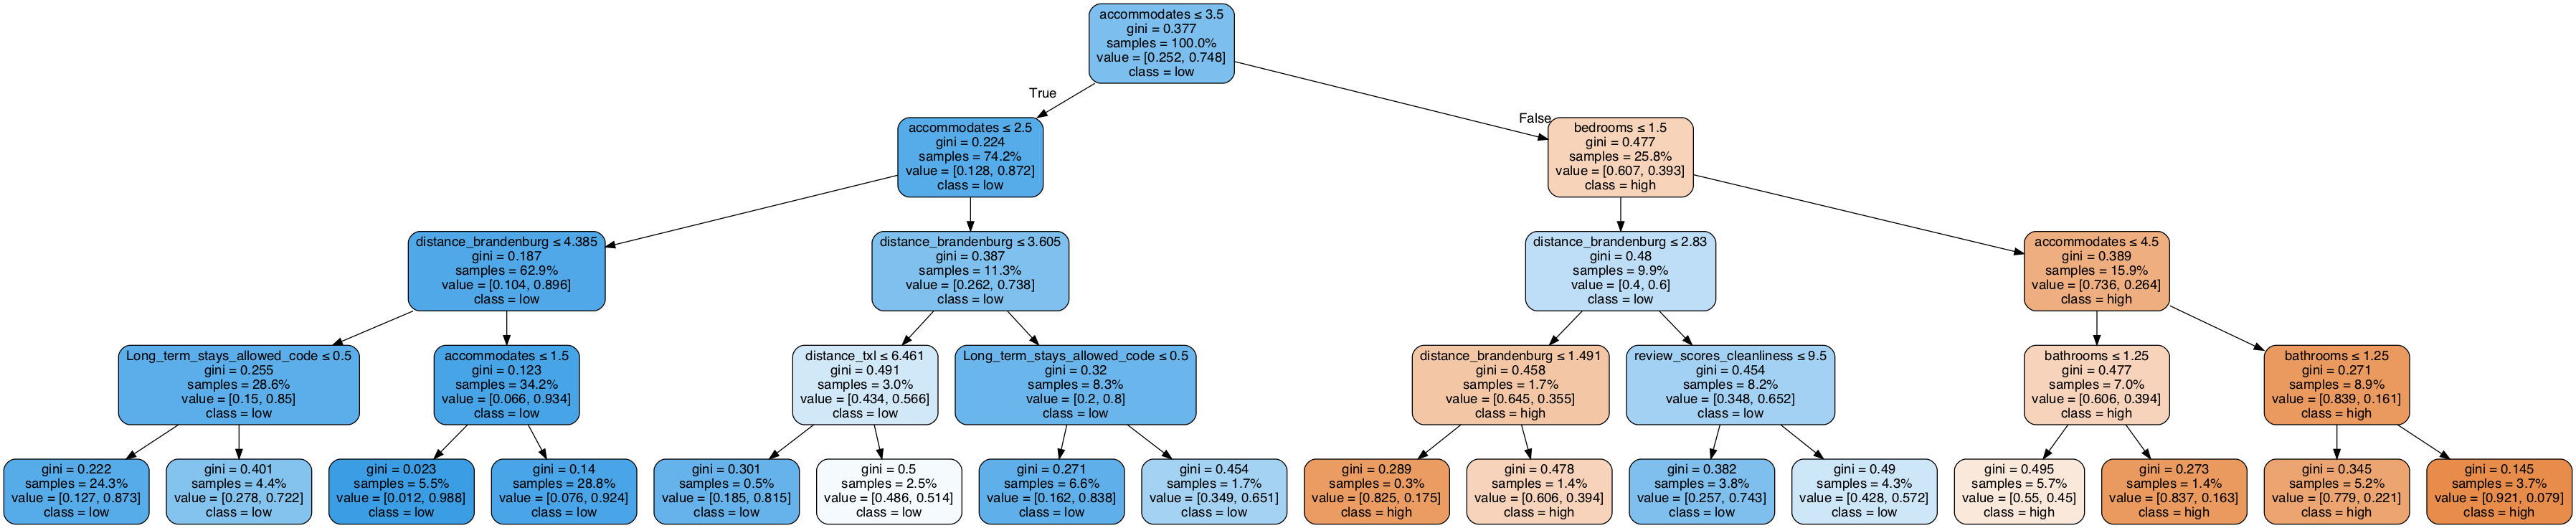

In [264]:
class_tree = DecisionTreeClassifier(max_depth=4) #try w/different depths
class_tree.fit(X_dt, y_dt)
y_pred_class_tree = class_tree.predict(X_dt)

dot_data = StringIO()
export_graphviz(decision_tree=class_tree,
                out_file=dot_data,
                filled=True,
                rounded=True,
                proportion=True,
                feature_names = X_dt.columns,
                class_names = ['high', 'low'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Confusion Matrix (for Decision Tree)

In [275]:
from sklearn.metrics import confusion_matrix

y_pred = class_tree.predict(X_dt)
confusion_matrix(y_dt,y_pred)

### Checking the good-ness of the classification tree in classifying whether Airbnbs are 'high' in price or 'low'
### Note: 'high' denotes a price listing above the 75th percentile (~75)
# 1619 observations are predicted high and are actually high
# 1560 observations are predicted low and are actually high
# 608 observations are predicted high and are actually low
# 8837 observations are predicted low are actually low

array([[1619, 1560],
       [ 608, 8837]])

### Accuracy, Precision, Recall, and F-Measure (for Decision Tree)

In [279]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
precision = precision_score(y_dt, y_pred, average="binary", pos_label="high")
recall = recall_score(y_dt, y_pred, average="binary", pos_label="high")
accuracy = accuracy_score(y_dt, y_pred)
print("Precision: {:0.1f}%, Recall: {:.1f}%, Accuracy: {:0.1f}%".format(100*precision, 100*recall, 100*accuracy))

Precision: 72.7%, Recall: 50.9%, Accuracy: 82.8%


In [280]:
f_measure = (2*precision*recall)/(precision + recall)
f_measure

0.5989641139474658